##  Prediction of price of an Airbnb rental using Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('analysisData.csv')
df.head(2)

C:\Users\sonal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (40,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30551,Bright & Sunny Brooklyn 1BDR with Amazing Views,Brooklyn apartment in one of the best neighbou...,Elevator building in quiet yet central Greenpo...,Brooklyn apartment in one of the best neighbou...,none,Greenpoint / North Williamsburg,"Great, apartment in the heart of the Greenpoin...",Greenpoint Ave G train - 8 minutes Bedford L ...,Full apartment.,...,f,f,moderate,f,f,1,1,0,0,0.80
1,6174,1 Modern Bright Bedroom In The Heart of Chel...,"Newly renovated, modern and bright 2 bedroom a...",I'm renting bedroom # 1 or the whole apartment...,"Newly renovated, modern and bright 2 bedroom a...",none,The apartment is located in the center of Chel...,NaN,"Super easy access to all subways (A,C,E,1,2,3 ...","Chelsea, the High Line , Times Square, All sub...",...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30338 entries, 0 to 30337
Columns: 103 entries, id to reviews_per_month
dtypes: float64(16), int64(32), object(55)
memory usage: 23.8+ MB


In [4]:
df.describe()

,id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,30338.000000,0.0,0.0,0.0,3.033800e+04,0.0,30338.000000,30338.000000,30338.000000,30338.000000,...,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30338.000000,30336.000000
mean,19027.075845,NaN,NaN,NaN,5.676825e+07,NaN,5.872734,5.872734,40.728535,-73.952153,...,9.273485,9.746193,9.753708,9.534017,9.390434,3.668600,2.290626,1.277276,0.100699,1.329574
std,10949.401266,NaN,NaN,NaN,6.628774e+07,NaN,43.378693,43.378693,0.054383,0.045991,...,1.075639,0.696520,0.704707,0.774282,0.900464,12.097055,11.152017,4.344850,0.956953,1.574240
min,1.000000,NaN,NaN,NaN,2.787000e+03,NaN,0.000000,0.000000,40.508680,-74.239860,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9524.750000,NaN,NaN,NaN,6.672280e+06,NaN,1.000000,1.000000,40.689080,-73.983190,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.220000
50%,19073.500000,NaN,NaN,NaN,2.590616e+07,NaN,1.000000,1.000000,40.722490,-73.955450,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.710000
75%,28512.500000,NaN,NaN,NaN,8.804306e+07,NaN,2.000000,2.000000,40.763040,-73.936420,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.970000
max,37923.000000,NaN,NaN,NaN,2.464229e+08,NaN,1199.000000,1199.000000,40.908040,-73.712990,...,10.000000,10.000000,10.000000,10.000000,10.000000,192.000000,192.000000,115.000000,24.000000,19.360000


## Data Cleaning

In [5]:
df.iloc[:2,]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30551,Bright & Sunny Brooklyn 1BDR with Amazing Views,Brooklyn apartment in one of the best neighbou...,Elevator building in quiet yet central Greenpo...,Brooklyn apartment in one of the best neighbou...,none,Greenpoint / North Williamsburg,"Great, apartment in the heart of the Greenpoin...",Greenpoint Ave G train - 8 minutes Bedford L ...,Full apartment.,...,f,f,moderate,f,f,1,1,0,0,0.80
1,6174,1 Modern Bright Bedroom In The Heart of Chel...,"Newly renovated, modern and bright 2 bedroom a...",I'm renting bedroom # 1 or the whole apartment...,"Newly renovated, modern and bright 2 bedroom a...",none,The apartment is located in the center of Chel...,NaN,"Super easy access to all subways (A,C,E,1,2,3 ...","Chelsea, the High Line , Times Square, All sub...",...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37


In [6]:
len(df)

30338

In [7]:
# top 30 features that have missing values
for i, v in df.isnull().sum().nlargest(30).items():
    print(i, " : ", round((v/30338)*100, 1))

thumbnail_url  :  100.0
medium_url  :  100.0
xl_picture_url  :  100.0
host_acceptance_rate  :  100.0
jurisdiction_names  :  100.0
license  :  100.0
monthly_price  :  99.4
square_feet  :  99.0
weekly_price  :  90.0
notes  :  54.8
interaction  :  37.5
access  :  36.8
host_about  :  35.2
house_rules  :  35.0
security_deposit  :  34.9
neighborhood_overview  :  33.6
transit  :  30.6
host_response_time  :  28.6
host_response_rate  :  28.6
space  :  25.0
cleaning_fee  :  16.5
host_neighbourhood  :  13.6
summary  :  3.6
zipcode  :  1.2
description  :  0.8
market  :  0.2
host_location  :  0.2
city  :  0.1
neighbourhood  :  0.0
beds  :  0.0


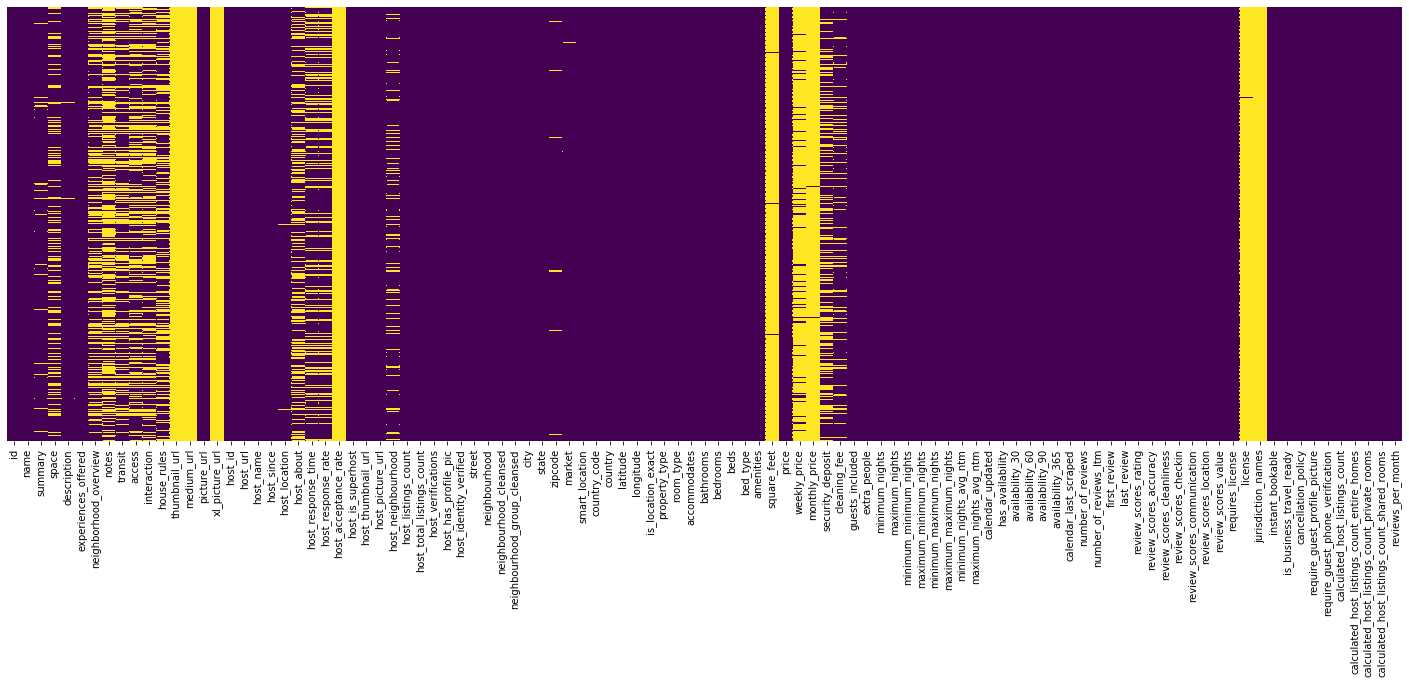

In [8]:
plt.figure(figsize=(25,8))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
def remove_nan(df):
    
    #df['boroughs'] = df['neighbourhood_group_cleansed'].apply(lambda x:x.split(',')[0].strip())
    df['boroughs'] = df['neighbourhood_group_cleansed']
    df['beds'].fillna(value= df['beds'].mean(), inplace=True)

    df.drop(['experiences_offered','thumbnail_url','medium_url','xl_picture_url','host_acceptance_rate','square_feet','weekly_price','monthly_price','license',
             'jurisdiction_names','notes', 'neighborhood_overview', 'transit','access','interaction','house_rules','host_about','security_deposit',
             'host_response_time','host_response_rate', 'space', 'host_neighbourhood','cleaning_fee','host_location','summary',
             'zipcode','description','name','first_review','last_review','state', 'city', 'market'], axis=1, inplace=True)
    return df


df = remove_nan(df)

df.iloc[:2, :]

,id,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,boroughs
0,30551,https://a0.muscache.com/im/pictures/82c15798-6...,20126746,https://www.airbnb.com/users/show/20126746,Alexandra,2014-08-16,f,https://a0.muscache.com/im/pictures/user/100b0...,https://a0.muscache.com/im/pictures/user/100b0...,1,...,f,moderate,f,f,1,1,0,0,0.80,Brooklyn
1,6174,https://a0.muscache.com/im/pictures/c7820fca-f...,21368131,https://www.airbnb.com/users/show/21368131,Bertrand,2014-09-15,f,https://a0.muscache.com/im/pictures/5caa1b4a-8...,https://a0.muscache.com/im/pictures/5caa1b4a-8...,2,...,f,strict_14_with_grace_period,f,f,2,1,1,0,0.37,Manhattan


In [10]:
def dummies_set_t_f_vlaues(df):
    
    boroughs = pd.get_dummies(df['boroughs'])
    room_type = pd.get_dummies(df['room_type'])
    property_type = pd.get_dummies(df['property_type'])
    df = pd.concat([df,boroughs, room_type, property_type], axis=1)
    df.dropna(inplace= True)
    return df

data = dummies_set_t_f_vlaues(df)
data.head(3)

,id,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,...,Houseboat,Loft,Nature lodge,Other,Resort,Serviced apartment,Tent,Tiny house,Townhouse,Villa
0,30551,https://a0.muscache.com/im/pictures/82c15798-6...,20126746,https://www.airbnb.com/users/show/20126746,Alexandra,2014-08-16,f,https://a0.muscache.com/im/pictures/user/100b0...,https://a0.muscache.com/im/pictures/user/100b0...,1,...,0,0,0,0,0,0,0,0,0,0
1,6174,https://a0.muscache.com/im/pictures/c7820fca-f...,21368131,https://www.airbnb.com/users/show/21368131,Bertrand,2014-09-15,f,https://a0.muscache.com/im/pictures/5caa1b4a-8...,https://a0.muscache.com/im/pictures/5caa1b4a-8...,2,...,0,0,0,0,0,0,0,0,0,0
2,21838,https://a0.muscache.com/im/pictures/e6e6540e-2...,55209173,https://www.airbnb.com/users/show/55209173,Camille,2016-01-18,f,https://a0.muscache.com/im/pictures/ecd1fa54-2...,https://a0.muscache.com/im/pictures/ecd1fa54-2...,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.isnull().sum()

id                                              0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_is_superhost                               0
host_thumbnail_url                              0
host_picture_url                                0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
street                                          0
neighbourhood                                   8
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
smart_location                                  0
country_code                                    0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328 entries, 0 to 30337
Columns: 108 entries, id to Villa
dtypes: float64(7), int64(32), object(32), uint8(37)
memory usage: 17.7+ MB


## Exploratory Data Analysis

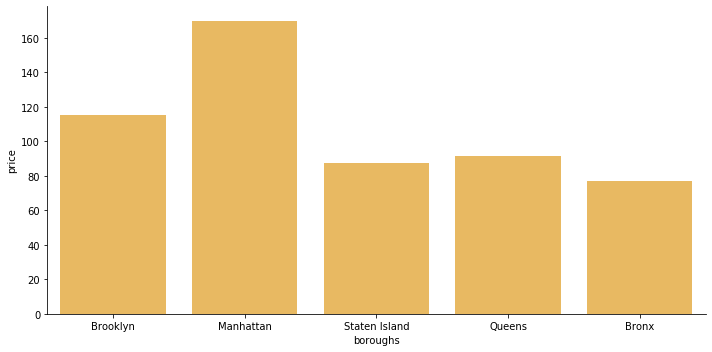

In [13]:
sns.catplot(x="boroughs", y="price", kind="bar", data=data, aspect=2, color='orange', alpha=0.7, ci=None);

From the above graph, we can interpret that Manhattan has a maximum price for Airbnb rental and then, Brooklyn, Queens, Staten Island, and the Bronx have rental pricing in decreasing order.

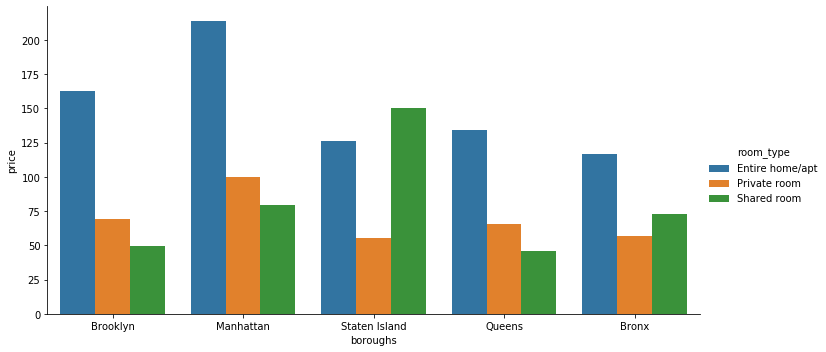

In [14]:
sns.catplot(x="boroughs", y="price", hue='room_type', kind="bar", data=data, aspect=2, ci=False)

Here, we can see room types (Entire home/apt, Private room and Shared room) according to NYC boroughs. At first glance, we can notice Manhattan has a maximum price for Entire home/apt and Private room rental whereas Staten Island has a maximum price for Shared room rental. 

On the contrary, the Bronx has a low rental price for all room types.

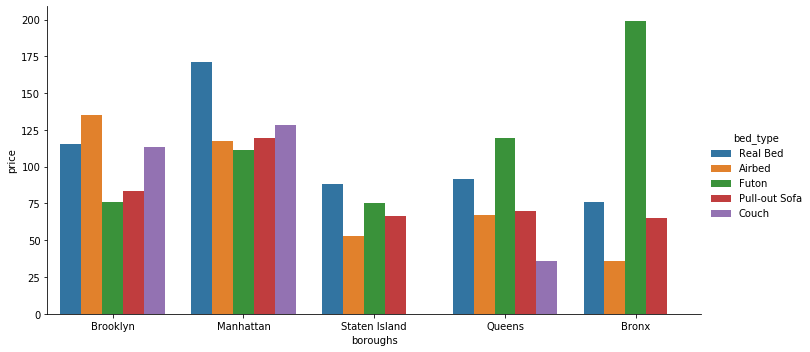

In [15]:
sns.catplot(x="boroughs", y="price", hue='bed_type', kind="bar", data=data, aspect=2, ci=False)

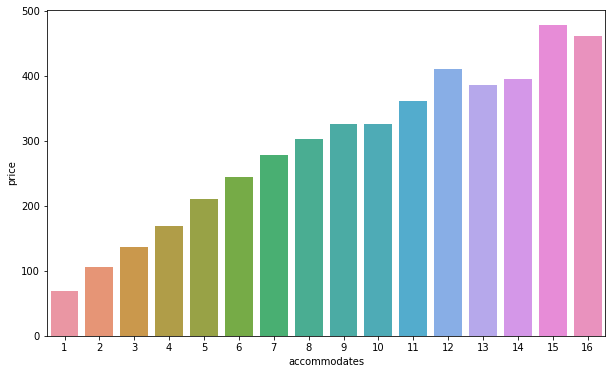

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x='accommodates', y='price', data=data, ci=None)

The above graph shows the rental price is increasing according to accommodates, and it makes sense because if we stay longer, we have to pay a high price.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328 entries, 0 to 30337
Columns: 108 entries, id to Villa
dtypes: float64(7), int64(32), object(32), uint8(37)
memory usage: 19.0+ MB


In [18]:
corr = data[data.columns[1:]].corr()['price'][:]
corr.nlargest(20).index

Index(['price', 'accommodates', 'Entire home/apt', 'beds', 'bedrooms',
       'guests_included', 'Manhattan', 'bathrooms', 'review_scores_location',
       'extra_people', 'calculated_host_listings_count_entire_homes', 'Loft',
       'Resort', 'availability_365', 'review_scores_cleanliness',
       'Condominium', 'Serviced apartment', 'latitude', 'review_scores_rating',
       'host_listings_count'],
      dtype='object')

## Airbnb Price Predication using  Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# X = data[['extra_people','guests_included','beds','bedrooms','bathrooms','accommodates', 
#           'review_scores_location','calculated_host_listings_count_entire_homes',
#           'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
#           'Loft', 'Resort']]

X = data[['accommodates', 'Entire home/apt','Private room', 'Shared room', 'beds', 'bedrooms',
       'guests_included', 'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'bathrooms', 
       'review_scores_location', 'extra_people', 'calculated_host_listings_count_entire_homes', 'Loft',
       'Resort', 'availability_365', 'review_scores_cleanliness']]

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
prediction = model.predict(X_test)

Text(0, 0.5, 'Predication')

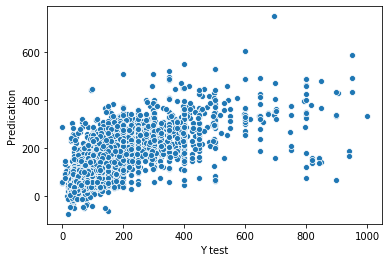

In [22]:
sns.scatterplot(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predication')

In [23]:
linear_regression_score = model.score(X_test, y_test)
linear_regression_score

0.5066190650470266

In [24]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coef_'])

,Coef_
accommodates,12.483518
Entire home/apt,49.870107
Private room,-13.978490
Shared room,-35.891618
beds,-0.237032
bedrooms,27.253643
guests_included,1.541689
Bronx,-15.045356
Brooklyn,4.421404
Manhattan,56.358596


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
print('MAE :', mean_absolute_error(y_test, prediction))
print('MSE :', mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(mean_squared_error(y_test, prediction)))

MAE : 45.40477425831843
MSE : 5266.131480229738
RMSE : 72.56811614083514


## Predicting price for unseen data

In [27]:
test_df = pd.read_csv('scoringData.csv', index_col=0)

test_df = remove_nan(test_df)
test_data = dummies_set_t_f_vlaues(test_df)

# test_data = test_data[['extra_people','guests_included','beds','bedrooms','bathrooms','accommodates', 
#           'review_scores_location','calculated_host_listings_count_entire_homes',
#          'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
#          'Loft', 'Resort']]
test_data = test_data[['accommodates', 'Entire home/apt','Private room', 'Shared room', 'beds', 'bedrooms',
       'guests_included', 'Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'bathrooms', 
       'review_scores_location', 'extra_people', 'calculated_host_listings_count_entire_homes', 'Loft',
       'Resort', 'availability_365', 'review_scores_cleanliness']]

In [28]:
test_price = model.predict(test_data)
sample_price = pd.DataFrame([test_data.index,test_price])

final_df = sample_price.T
final_df.columns = ['id', 'price']
final_df['id'] = final_df['id'].astype(int)

final_df

,id,price
0,2,159.723139
1,7,96.814120
2,8,183.840128
3,9,161.178256
4,26,104.662085
5,28,139.213507
6,34,109.761719
7,35,137.132946
8,40,86.979657
9,48,156.400307


In [29]:
header = ["id", "price"]
final_df.to_csv('sample_submission.csv', columns = header, index=False)

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [31]:
regr = RandomForestRegressor(max_depth=15, random_state=42, n_estimators=40)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [32]:
prediction = regr.predict(X_test)

In [33]:
linear_regression_score = regr.score(X_train, y_train)
linear_regression_score

0.83422924114387

In [34]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.8276666936424006

In [37]:
print('MAE :', mean_absolute_error(y_test, prediction))
print('MSE :', mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(mean_squared_error(y_test, prediction)))

MAE : 28.620911487895007
MSE : 1839.4100489276734
RMSE : 42.88834397511372


In [35]:
test_price = regr.predict(test_data)
sample_price = pd.DataFrame([test_data.index,test_price])

final_df = sample_price.T
final_df.columns = ['id', 'price']
final_df['id'] = final_df['id'].astype(int)

final_df

,id,price
0,2,216.739498
1,7,83.951815
2,8,131.525059
3,9,142.798821
4,26,80.667630
5,28,91.807388
6,34,82.793766
7,35,205.793945
8,40,118.512010
9,48,142.601047


In [38]:
header = ["id", "price"]
final_df.to_csv('sample_submission.csv', columns = header, index=False)